In [107]:
#Installing a library
pip install vecstack

SyntaxError: ignored

In [127]:
#Importing Libraries
from pandas import DataFrame
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import os
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn.ensemble import AdaBoostClassifier
import re
from sklearn.calibration import CalibratedClassifierCV
from scipy import stats
from sklearn.metrics import log_loss
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from vecstack import stacking
import pandas as pd
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import sklearn
import warnings
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from imblearn.metrics import geometric_mean_score
warnings.filterwarnings('ignore')
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [128]:
#Uploading Dataset
from google.colab import files
uploaded = files.upload()

Saving dataset_heart.csv to dataset_heart (2).csv


In [129]:
#Reading Dataset
import io
dt = pd.read_csv(io.BytesIO(uploaded['dataset_heart.csv']))
dt.shape

(1190, 12)

In [130]:
dt.head()


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


***Data Enriching***

In [131]:
# feature renaming to the proper name
dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','target']

In [132]:
# transforming attributes into category attributes

dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'typical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 2] = 'atypical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 3] = 'non-anginal pain'
dt['chest_pain_type'][dt['chest_pain_type'] == 4] = 'asymptomatic'



dt['rest_ecg'][dt['rest_ecg'] == 0] = 'normal'
dt['rest_ecg'][dt['rest_ecg'] == 1] = 'ST-T wave abnormality'
dt['rest_ecg'][dt['rest_ecg'] == 2] = 'left ventricular hypertrophy'


dt['st_slope'][dt['st_slope'] == 0] = 'normal'
dt['st_slope'][dt['st_slope'] == 1] = 'upsloping'
dt['st_slope'][dt['st_slope'] == 2] = 'flat'
dt['st_slope'][dt['st_slope'] == 3] = 'downsloping'

dt["sex"] = dt.sex.apply(lambda  x:'male' if x==1 else 'female')

In [133]:
# Following feature encoding, examining the top 5 entries of the dataset
dt.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,male,atypical angina,140,289,0,normal,172,0,0.0,upsloping,0
1,49,female,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,male,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,0
3,48,female,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,male,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,0


In [134]:
## columnarly examining the dataset for missing elements
dt.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
target                     0
dtype: int64

***Exploratory Data Analysis***

In [135]:
# numerical column summary statistics
dt.describe(include =[np.number])

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,132.153782,210.363866,0.213445,139.732773,0.387395,0.922773,0.528571
std,9.358203,18.368823,101.420489,0.409912,25.517636,0.487360,1.086337,0.499393
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,0.000000,140.500000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,269.750000,0.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


Resting blood pressure and cholesterol both contain outliers, as can be seen from the description above. While cholesterol has an outlier on the upper side with a highest value of 603, resting blood pressure has an outlier on the lower side.

In [136]:
# categorical columns - summary statistics 
dt.describe(include =[np.object])

,sex,chest_pain_type,rest_ecg,st_slope
count,1190,1190,1190,1190
unique,2,4,3,4
top,male,asymptomatic,normal,flat
freq,909,625,684,582


***Distribution - Heart Disease***

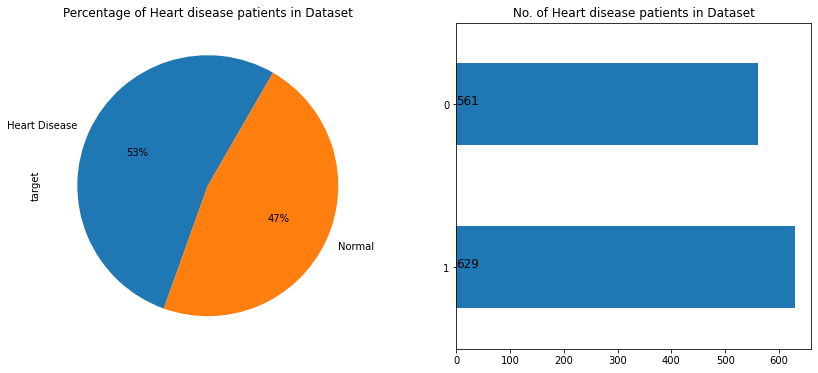

In [137]:
# Plotting attrition of employees
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = dt['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = dt["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(dt["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()

The dataset is balanced having 629 heart disease patients and 561 normal patients

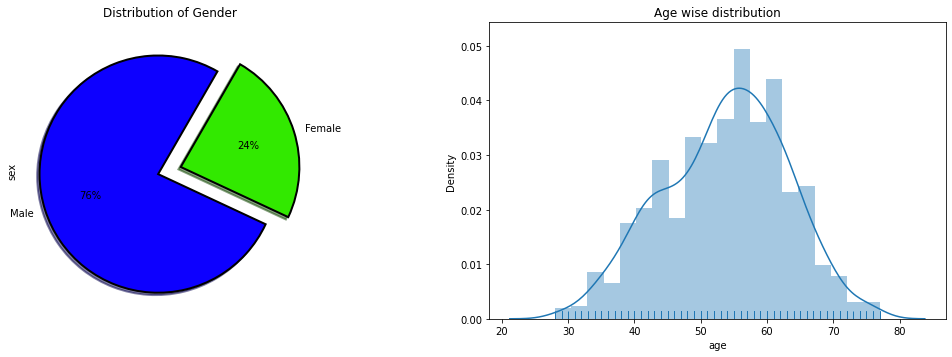

In [138]:
#Distribution -  Gender, Agewise 
plt.figure(figsize=(18,12))
plt.subplot(221)
dt["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")
plt.subplot(222)
ax= sns.distplot(dt['age'], rug=True)
plt.title("Age wise distribution")
plt.show()

As we can see from above plot, in this dataset males percentage is way too higher than females where as average age of patients is around 55.

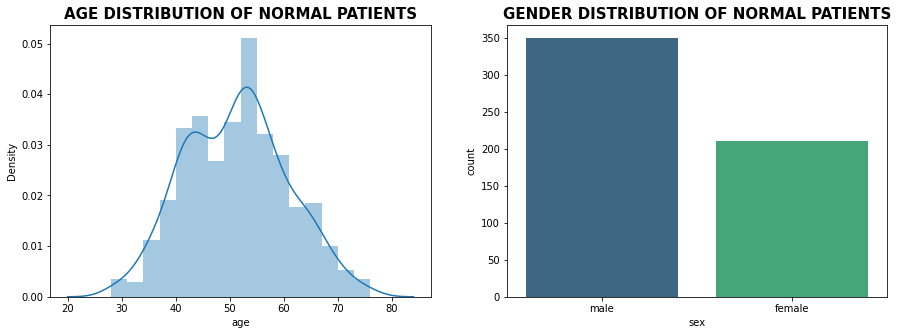

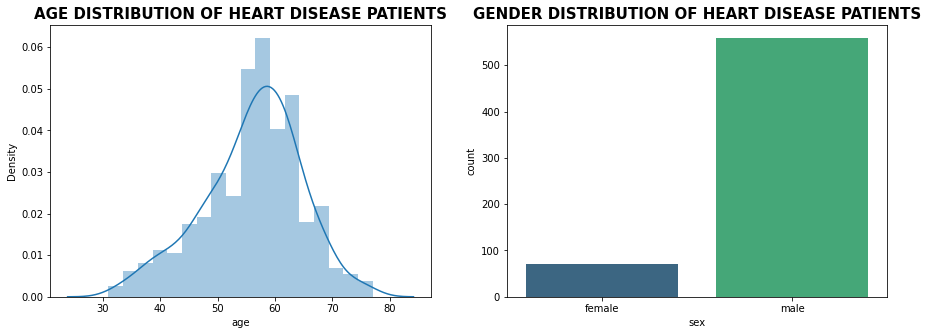

In [139]:
attr_1=dt[dt['target']==1]
attr_0=dt[dt['target']==0]
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )
plt.show()

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()

As we can see from above plot more patients accounts for heart disease in comparison to females whereas mean age for heart disease patients is around 58 to 60 years

***Distribution - Chest Pain***

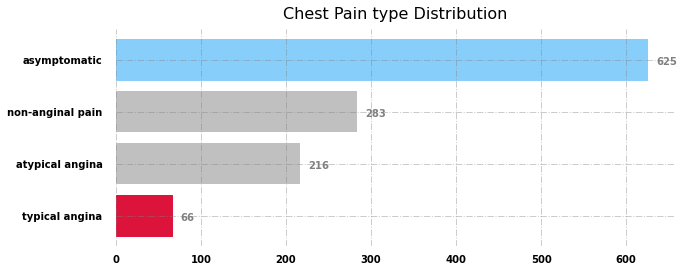

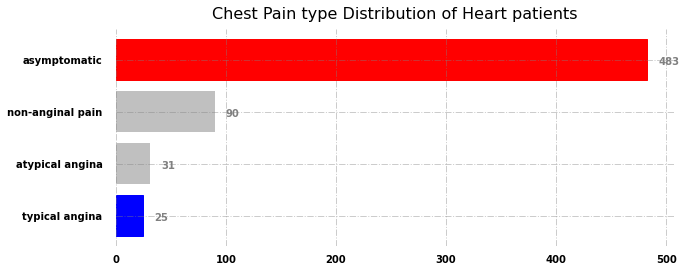

In [140]:
fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=dt.chest_pain_type.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('lightskyblue')
mn[3].set_color('crimson')


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Chest Pain type Distribution',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()


fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=attr_1.chest_pain_type.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('red')
mn[3].set_color('blue')


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Chest Pain type Distribution of Heart patients',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()


In [141]:
#investigating the patients with heart disease based on type of chest pain
plot_criteria= ['chest_pain_type', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
chest_pain_type,,
asymptomatic,25.310000,76.790000
atypical angina,32.980000,4.930000
non-anginal pain,34.400000,14.310000
typical angina,7.310000,3.970000


As we can see from the accompanying plot, 76% of heart disease patients who experience chest pain do so without any other symptoms.

In India, asymptomatic heart attacks, also referred to as silent myocardial infarction (SMI), account for 45–50% of cardiac-related morbidities each year as well as some premature deaths. Males are more prone than females to develop SMI in middle life, with male cases being twice as common. SMI is known as a silent killer since the symptoms are so weak compared to a real heart attack. When compared to the symptoms of a typical heart attack, which include severe chest pain, stabbing pain in the arms, neck, and jaw, sudden shortness of breath, perspiration, and dizziness, symptoms of SMI are far more fleeting and frequently mistaken for everyday discomfort.

***Distribution - Rest ECG***

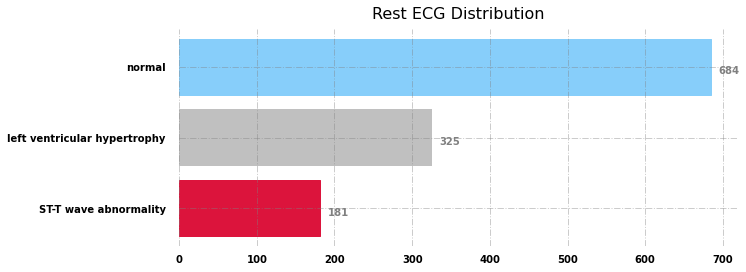

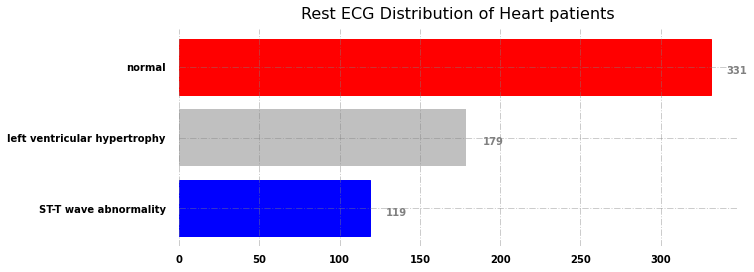

In [142]:
fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=dt.rest_ecg.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('lightskyblue')
mn[2].set_color('crimson')


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Rest ECG Distribution',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()


fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=attr_1.rest_ecg.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('red')
mn[2].set_color('blue')


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Rest ECG Distribution of Heart patients',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()

In [143]:
#Exploring the Heart Disease patients based on REST ECG
plot_criteria= ['rest_ecg', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
rest_ecg,,
ST-T wave abnormality,11.050000,18.920000
left ventricular hypertrophy,26.020000,28.460000
normal,62.920000,52.620000


The electrical activity of your heart is captured by an electrocardiogram. It is a routine test that is frequently used to identify heart issues and keep tabs on the heart's health. Electrocardiograms (ECGs, EKGs), also known as. ECG, however, has its limitations. Although it measures heart rate and rhythm, it does not always reveal artery obstructions. Because of this, 52% of the heart disease patients in our dataset have normal ECGs.

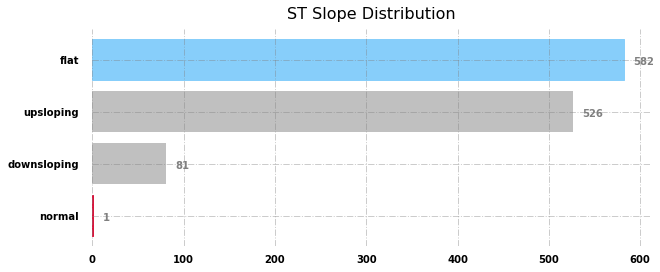

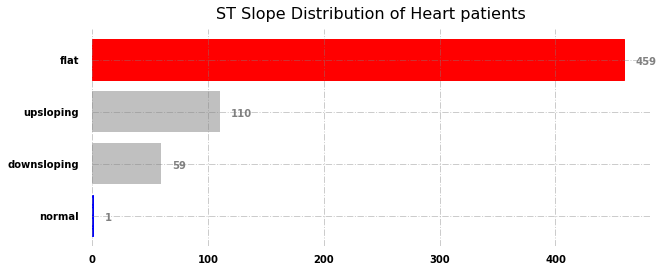

In [144]:
fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=dt.st_slope.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('lightskyblue')
mn[3].set_color('crimson')


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('ST Slope Distribution',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()


fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=attr_1.st_slope.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('red')
mn[3].set_color('blue')


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('ST Slope Distribution of Heart patients',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()

In [145]:
#Exploring the Heart Disease patients based on ST Slope
plot_criteria= ['st_slope', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
st_slope,,
downsloping,3.920000,9.380000
flat,21.930000,72.970000
normal,0.000000,0.160000
upsloping,74.150000,17.490000


In the majority of research studies, the ST segment/heart rate slope (ST/HR slope) has been suggested as a more precise ECG criterion for identifying severe coronary artery disease (CAD).

As we can see from the plot above, upsloping is a good sign because it is present in 74% of normal patients compared to 72.97% of cardiac patients who had flat sloping.

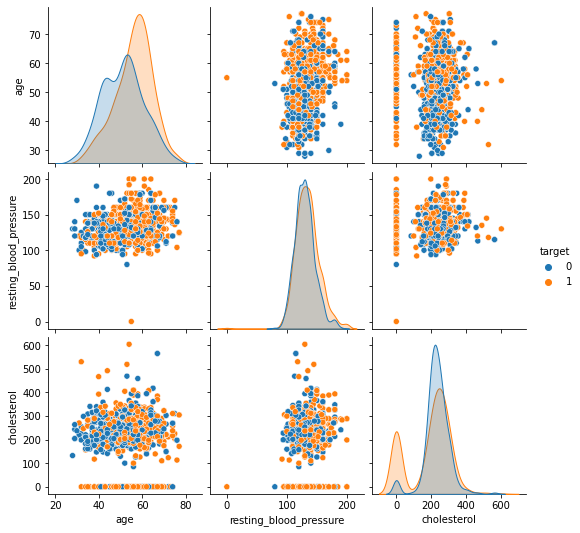

In [146]:
#Distribution - Numerical features
sns.pairplot(dt, hue = 'target', vars = ['age', 'resting_blood_pressure', 'cholesterol'] )

From the above plot it is clear that as the age increases chances of heart disease increases

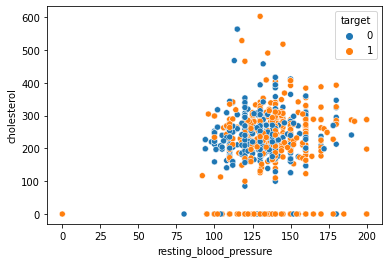

In [147]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'cholesterol', hue = 'target', data = dt)

From the above plot we can see outliers clearly as for some of the patients cholestrol is 0 whereas for one patient both cholestrol and resting bp is 0 which is may be due to missing entries we will filter these ouliers later

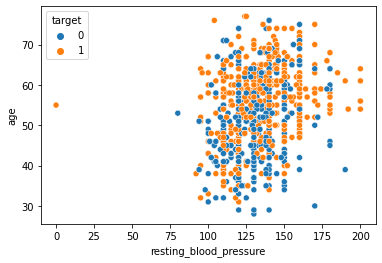

In [148]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'age', hue = 'target', data = dt)

***Outlier Removal & Detection***

***Detecting outlier using z-score***

In [149]:
# According to EDA, outliers can be found while filtering out numerical parameters like age, resting blood pressure, cholesterol, and maximum heart rate.

dt_numeric = dt[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved']]

In [150]:
dt_numeric.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved
0,40,140,289,172
1,49,160,180,156
2,37,130,283,98
3,48,138,214,108
4,54,150,195,122


In [151]:
# calculating the dataset's z-score for the numerical columns
z = np.abs(stats.zscore(dt_numeric))
print(z)

           age  resting_blood_pressure  cholesterol  max_heart_rate_achieved
0     1.466728                0.427328     0.775674                 1.265039
1     0.504600                1.516587     0.299512                 0.637758
2     1.787437                0.117301     0.716489                 1.636136
3     0.611503                0.318402     0.035867                 1.244085
4     0.029915                0.971958     0.151550                 0.695214
...        ...                     ...          ...                      ...
1185  0.932213                1.206560     0.529071                 0.303164
1186  1.526558                0.645180     0.171279                 0.049682
1187  0.350624                0.117301     0.782852                 0.969650
1188  0.350624                0.117301     0.252877                 1.343449
1189  1.680534                0.318402     0.348832                 1.304244

[1190 rows x 4 columns]


from these points it is diffciult to say which points are outliers so we will now define threshold

In [152]:
# Defining threshold for filtering outliers 
threshold = 3
print(np.where(z > 3))

(array([  30,   76,  109,  149,  242,  366,  371,  391,  400,  450,  593,
        618,  734,  761, 1013, 1039, 1075]), array([2, 2, 1, 2, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1]))


Don't let the outcomes fool you. The list of row numbers in the first array and the list of column numbers in the second array, respectively, indicate that z[30][2] has a Z-score higher than 3. There are a total of 17 outliers in the data.

In [153]:
#removing outliers and only keeping the data points that are below the threshold
dt = dt[(z < 3).all(axis=1)]

In [154]:
dt.shape

(1173, 12)

Great !! All 17 outlier data points have been eliminated at this time.

Now, we first encode categorical variables as dummy variables and separate feature and target variables before separating the dataset into train and test.

In [155]:
## encoding categorical variables
dt = pd.get_dummies(dt, drop_first=True)

dt.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_normal,st_slope_upsloping
0,40,140,289,0,172,0,0.0,0,1,1,0,0,0,1,0,0,1
1,49,160,180,0,156,0,1.0,1,0,0,1,0,0,1,1,0,0
2,37,130,283,0,98,0,0.0,0,1,1,0,0,0,0,0,0,1
3,48,138,214,0,108,1,1.5,1,0,0,0,0,0,1,1,0,0
4,54,150,195,0,122,0,0.0,0,1,0,1,0,0,1,0,0,1


In [156]:
dt.shape

(1173, 17)

In [157]:
# dividing the dataset into features (X) and target variables (Y)
X = dt.drop(['target'],axis=1)
y = dt['target']

In [158]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [159]:
print('------------Training Set------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)
print(y_test.shape)

------------Training Set------------------
(938, 16)
(938,)
------------Test Set------------------
(235, 16)
(235,)


***Normalization***

In [160]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.fit_transform(X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_train.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_normal,st_slope_upsloping
1167,0.591837,0.193548,0.682281,0,0.562963,1,0.584416,1,0,0,0,0,1,1,0,0
787,0.836735,0.731183,0.476578,1,0.474074,0,0.207792,1,0,0,1,1,0,1,0,0
208,0.142857,0.193548,0.523422,0,0.540741,0,0.194805,1,1,0,0,0,1,1,0,0
617,0.857143,0.408602,0.655804,0,0.311111,0,0.506494,1,0,0,0,1,0,1,0,0
253,0.673469,0.354839,0.594705,0,0.355556,1,0.194805,1,0,0,0,0,0,0,0,1


In [161]:
X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.transform(X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_test.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_normal,st_slope_upsloping
1098,0.204082,0.301075,0.470468,0,0.851852,1,0.688312,1,0,0,1,0,1,1,0,0
835,0.530612,0.301075,0.525458,0,0.592593,0,0.246753,1,0,1,0,1,0,1,0,0
670,0.714286,0.516129,0.397149,0,0.829630,0,0.194805,0,1,0,0,0,1,0,0,1
502,0.714286,0.408602,0.627291,0,0.525926,1,0.454545,1,0,0,0,0,1,1,0,0
498,0.673469,0.580645,0.490835,0,0.600000,1,0.584416,1,0,0,0,0,1,0,0,0


***Cross Validation***

This stage involves creating many baseline models and using 10-fold cross validation to select the best baseline models for level 0 of the stacked ensemble approach.

In [163]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
import xgboost as xgb
# function initializing baseline machine learning models
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR_L2'   , LogisticRegression(penalty='l2')))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN7'  , KNeighborsClassifier(7)))
    basedModels.append(('KNN5'  , KNeighborsClassifier(5)))
    basedModels.append(('KNN9'  , KNeighborsClassifier(9)))
    basedModels.append(('KNN11'  , KNeighborsClassifier(11)))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM Linear'  , SVC(kernel='linear',gamma='auto',probability=True)))
    basedModels.append(('SVM RBF'  , SVC(kernel='rbf',gamma='auto',probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier(n_estimators=100,max_features='sqrt')))
    basedModels.append(('RF_Ent100'   , RandomForestClassifier(criterion='entropy',n_estimators=100)))
    basedModels.append(('RF_Gini100'   , RandomForestClassifier(criterion='gini',n_estimators=100)))
    basedModels.append(('ET100'   , ExtraTreesClassifier(n_estimators= 100)))
    basedModels.append(('ET500'   , ExtraTreesClassifier(n_estimators= 500)))
    basedModels.append(('MLP', MLPClassifier()))
    basedModels.append(('SGD3000', SGDClassifier(max_iter=1000, tol=1e-4)))
    basedModels.append(('XGB_2000', xgb.XGBClassifier(n_estimators= 2000)))
    basedModels.append(('XGB_500', xgb.XGBClassifier(n_estimators= 500)))
    basedModels.append(('XGB_100', xgb.XGBClassifier(n_estimators= 100)))
    basedModels.append(('XGB_1000', xgb.XGBClassifier(n_estimators= 1000)))
    basedModels.append(('ET1000'   , ExtraTreesClassifier(n_estimators= 1000)))
    
    return basedModels

# function for performing 10-fold cross validation of all the baseline models
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
         
        
    return results,msg

In [164]:
models = GetBasedModel()

In [165]:
names,results = BasedLine2(X_train, y_train, models)

LR_L2: 0.853981 (0.038252)
LDA: 0.855056 (0.038268)
KNN7: 0.845436 (0.034630)
KNN5: 0.848616 (0.028049)
KNN9: 0.862480 (0.033086)
KNN11: 0.855022 (0.042299)
CART: 0.873153 (0.027026)
NB: 0.747323 (0.063520)
SVM Linear: 0.856108 (0.037732)
SVM RBF: 0.853958 (0.038028)
AB: 0.860398 (0.053193)
GBM: 0.895562 (0.032098)
RF_Ent100: 0.925406 (0.029647)
RF_Gini100: 0.928598 (0.032238)
ET100: 0.914688 (0.029820)
ET500: 0.915786 (0.029094)
MLP: 0.869984 (0.042114)
SGD3000: 0.819973 (0.086429)
XGB_2000: 0.928563 (0.017865)
XGB_500: 0.927499 (0.024182)
XGB_100: 0.895573 (0.027512)
XGB_1000: 0.928563 (0.018487)
ET1000: 0.918977 (0.026995)


In [166]:
#model building
#Random Forest Classifier (criterion = 'entropy')
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)
#Multi Layer Perceptron
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)
#K nearest neighbour (n=9)
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
#Extra Tree Classifier (n_estimators=500)
et_500 = ExtraTreesClassifier(n_estimators= 500)
et_500.fit(X_train,y_train)
y_pred_et500 = et_500.predict(X_test)
#XGBoost (n_estimators=100)
xgb = xgb.XGBClassifier(n_estimators= 100)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
#Support Vector Classifier (kernel='linear')
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)
#Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=1000, tol=1e-4)
sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)
#Adaboost Classifier
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)
#decision Tree Classifier (CART)
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)
#gradient boosting machine
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

In [167]:
#Model Selection
import xgboost as xgboost
# selecting list of top performing models to be used in stacked ensemble method
models = [
    RandomForestClassifier(criterion='entropy',n_estimators=100),
    MLPClassifier(),
    RandomForestClassifier(criterion='gini',n_estimators=100),
    KNeighborsClassifier(9),
    ExtraTreesClassifier(n_estimators= 500),
    ExtraTreesClassifier(n_estimators= 100),
    xgboost.XGBClassifier(n_estimators= 1000),
    xgboost.XGBClassifier(n_estimators= 100),
    xgboost.XGBClassifier(n_estimators= 500),
    xgboost.XGBClassifier(n_estimators= 2000),
    xgboost.XGBClassifier(),
    SGDClassifier(max_iter=1000, tol=1e-4),
    
    SVC(kernel='linear',gamma='auto',probability=True),
    AdaBoostClassifier(),
    DecisionTreeClassifier(),
    LinearDiscriminantAnalysis(),
    GradientBoostingClassifier(n_estimators=100,max_features='sqrt'),
    ExtraTreesClassifier(n_estimators= 1000),
]

Stacked Ensemble
A set of algorithms known as stacking, also known as Super Learning or Stacked Regression, involves training a second-level "metalearner" to determine the best arrangement of the base learners. In contrast to bagging and boosting, stacking aims to group together strong, diverse groupings of learners. citation: H2O

Stacking Algorithm
Step 1. Set up the ensemble.
a. Specify a list of L base algorithms (with a specific set of model parameters)..
b. Specify a metalearning algorithm..

Step 2. Train the ensemble.
a. Train each of the L base algorithms on the training set..
b. Perform k-fold cross-validation on each of these learners and collect the cross-validated predicted values from each of the L algorithms..
c. The N cross-validated predicted values from each of the L algorithms can be combined to form a new N x L matrix. This matrix, along wtih the original response vector, is called the “level-one” data. (N = number of rows in the training set.).
d. Train the metalearning algorithm on the level-one data. The “ensemble model” consists of the L base learning models and the metalearning model, which can then be used to generate predictions on a test set.

Step 3. Predict on new data.
a. To generate ensemble predictions, first generate predictions from the base learners.
b. Feed those predictions into the metalearner to generate the ensemble prediction.

Now, based on how well various baseline models performed in terms of cross validation accuracy, we will choose the top models for level 0 of the stacked ensemble so that their ensemble will perform better than a single machine learning model.

In [168]:
S_train, S_test = stacking(models,                   
                           X_train, y_train, X_test,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=5, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [18]

model  0:     [RandomForestClassifier]
    fold  0:  [0.89893617]
    fold  1:  [0.94680851]
    fold  2:  [0.89893617]
    fold  3:  [0.94117647]
    fold  4:  [0.90374332]
    ----
    MEAN:     [0.91792013] + [0.02143436]
    FULL:     [0.91791045]

model  1:     [MLPClassifier]
    fold  0:  [0.89893617]
    fold  1:  [0.88829787]
    fold  2:  [0.82978723]
    fold  3:  [0.89839572]
    fold  4:  [0.83957219]
    ----
    MEAN:     [0.87099784] + [0.03005452]
    FULL:     [0.87100213]

model  2:     [RandomForestClassifier]
    fold  0:  [0.89361702]
    fold  1:  [0.94148936]
    fold  2:  [0.90957447]
    fold  3:  [0.94117647]
    fold  4:  [0.89304813]
    ----
    MEAN:     [0.91578109] + [0.02169053]
    FULL:     [0.91577825]

model  3:     [KNeighborsClassifier]
    fold  0:  [0.88829787]
    fold  1:  [0.90425532]
    fold  2:  [0.79255319]
   

In [169]:
# initializing generalizer model i.e., MLP classifier in our case
model = MLPClassifier()
model = model.fit(S_train, y_train)
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

Final prediction score: [0.89361702]


# Model Evaluation
We will first specify the evaluation metrics we will use in this stage to assess our model. Sensitivity, specificity, Precision, F1-measure, Geometric Mean, Mathew Correlation Coefficient, and ultimately ROC AUC curve are the most crucial evaluation metrics for this issue domain.

# Sensitivity and Specificity
Sensitivity and specificity are two metrics used in machine learning to assess a model's performance. Specificity is the proportion of genuine negatives that the model correctly predicts, whereas sensitivity is the fraction of true positives that the model correctly predicts. A machine learning model's performance can be assessed using both metrics.

# Mathew Correlation coefficient
Instead, the Matthews correlation coefficient (MCC) is a more dependable statistical measure that only yields a high score if the prediction performed well in each of the four categories of the confusion matrix (true positives, false negatives, true negatives, and false positives), proportionally to the size of the dataset's positive and negative elements.

# Log Loss
When a prediction input is a probability value between 0 and 1, the performance of a classification model is measured using a logarithmic loss. Our machine learning models try to reduce this value as much as possible. A log loss of 0 would indicate a perfect model. As the anticipated likelihood departs from the actual label, log loss rises. As a result, making a prediction with a probability of.012 when the observation label is actually 1 would be poor and cause a high log loss.

# F1 Score
The weighted average of Precision and Recall is the F1 Score. Therefore, both false positives and false negatives are considered while calculating this score. Although F1 is generally more beneficial than accuracy, especially if you have an uneven class distribution, it is not intuitively as simple to understand as accuracy. When false positives and false negatives cost about the same, accuracy performs best. It is preferable to include both Precision and Recall if the costs of false positives and false negatives are significantly different. F1 score in our case is 0.701



,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,STacked Classifier,0.893617,0.871212,0.934959,0.848214,0.901961,0.891587,3.674396,0.788341


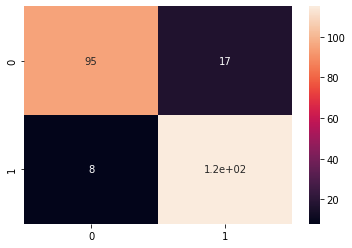

In [170]:
CM=confusion_matrix(y_test,y_pred)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred)
acc= accuracy_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

mathew = matthews_corrcoef(y_test, y_pred)
model_results =pd.DataFrame([['STacked Classifier',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

In [171]:
#Comparison with other Models
data = {'Random Forest': y_pred_rfe, 
                'MLP': y_pred_mlp, 
                'KNN': y_pred_knn, 
                'EXtra tree classifier': y_pred_et500,
                'XGB': y_pred_xgb, 
                'SVC': y_pred_svc, 
                'SGD': y_pred_sgd,
                'Adaboost': y_pred_ada, 
                'CART': y_pred_decc, 
                'GBM': y_pred_gbm }

models = pd.DataFrame(data) 
 
for column in models:
    CM=confusion_matrix(y_test,models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    loss_log = log_loss(y_test, models[column])
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    
    mathew = matthews_corrcoef(y_test, models[column])
    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
    model_results = model_results.append(results, ignore_index = True)

model_results

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,STacked Classifier,0.893617,0.871212,0.934959,0.848214,0.901961,0.891587,3.674396,0.788341
1,Random Forest,0.889362,0.859259,0.943089,0.830357,0.899225,0.886723,3.821376,0.781313
2,MLP,0.825532,0.810606,0.869919,0.776786,0.839216,0.823352,6.025999,0.650971
3,KNN,0.800000,0.787879,0.845528,0.750000,0.815686,0.797764,6.907851,0.599458
4,EXtra tree classifier,0.880851,0.868217,0.910569,0.848214,0.888889,0.879392,4.115316,0.761608
5,XGB,0.855319,0.856000,0.869919,0.839286,0.862903,0.854602,4.997161,0.709875
6,SVC,0.812766,0.788321,0.878049,0.741071,0.830769,0.809560,6.466933,0.627138
7,SGD,0.825532,0.820312,0.853659,0.794643,0.836653,0.824151,6.025992,0.650192
8,Adaboost,0.817021,0.812500,0.845528,0.785714,0.828685,0.815621,6.319943,0.633084
9,CART,0.846809,0.871795,0.829268,0.866071,0.850000,0.847670,5.291098,0.694584


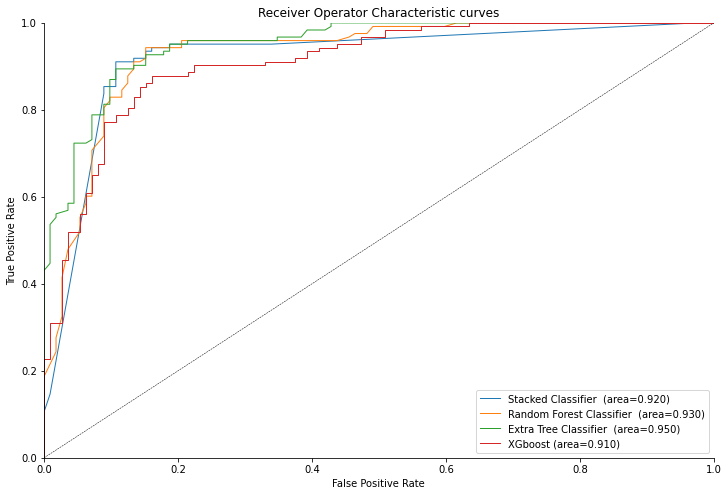

In [172]:
# ROC AUC Curve
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test,model.predict_proba(S_test),label='Stacked Classifier ',l='-')
roc_auc_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
roc_auc_plot(y_test,et_500.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
roc_auc_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

As we can see highest average area under the curve (AUC) of 0.950 is attained by Extra Tree Classifier


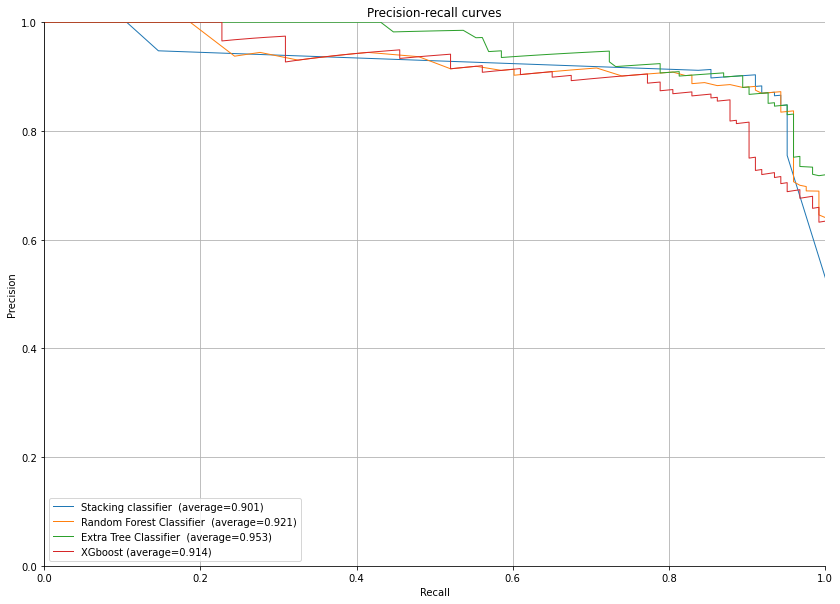

In [174]:
# Precision Recall curve¶
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_test,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_test, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))
precision_recall_plot(y_test,model.predict_proba(S_test),label='Stacking classifier ',l='-')
precision_recall_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
precision_recall_plot(y_test,et_500.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
precision_recall_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves')
sns.despine()


Findings:


1.   Stacked Ensemble Classifier is the top performance, as shown by the data above, with the highest test accuracy of 0.906, sensitivity of 0.943, and specificity of 0.866 as well as the highest f1-score of 0.9133, the lowest Log Loss of 3.23, and the highest ROC value of 0.904.
2.   Second-best classifiers are Random Forest and Extra Tree, both of which have identical performance metrics across the board.
3.   XGboost has third best sensitivity level
4.   As we've seen, a stacked ensemble of powerful machine learning algorithms outperformed individual machine learning models in terms of performance.
5.   We have also interpreted the random forest algorithm, which is the second-best performing algorithm.










